In [15]:
import sys
from pathlib import Path

# 1. Figure out the project root (one level up from notebooks/)
project_root = Path().cwd().parent.parent

# 2. Add the parent of 'notebooks' (the actual project root) to sys.path
sys.path.insert(0, str(project_root.parent))

# 3. Now we can import the function to inspect the .mat file
from src.data.displayData import inspect_mat_file

# 4. Use the function to inspect a .mat file
#    Replace the path with the actual path to your .mat file
mat_file = r'C:\Users\mattt\Skripsie\Projects\DTW-project\data\raw\LocalFunctions\u1002s0001_sg0001.mat'
inspect_mat_file(mat_file)

Loaded `u1002s0001_sg0001.mat` with scipy.io.loadmat:

Variable `localFunctions`:
  • type = ndarray
  • shape = (227, 9)
  • rows = 227, columns = 9
  • dtype = float64
  • No headings stored (raw numeric array)
  • Data:
[[-3.41859672e-03  1.82894800e+00  7.20824660e-01 ... -5.98944363e-01
   1.49882079e-02 -8.04762148e-01]
 [-3.41859672e-03  1.82894800e+00  1.31325857e+00 ... -5.98944363e-01
   1.49882079e-02 -8.04762148e-01]
 [-3.41859672e-03  1.82894800e+00  1.48096965e+00 ... -5.98944363e-01
   1.49882079e-02 -8.04762148e-01]
 ...
 [-2.47695625e+00 -8.97382782e-01 -2.85991562e+00 ...  4.13611441e+00
  -1.03549713e+00  3.35769885e-02]
 [-1.62158240e+00 -1.25511876e+00 -3.16920097e+00 ...  4.20318587e+00
  -9.72506343e-01 -4.28522803e-01]
 [-8.04515389e-01 -1.52330647e+00 -2.48964442e+00 ...  4.20970671e+00
  -5.99071615e-01 -6.91414530e-01]]
------------------------------------------------------------


{'localFunctions': array([[-3.41859672e-03,  1.82894800e+00,  7.20824660e-01, ...,
         -5.98944363e-01,  1.49882079e-02, -8.04762148e-01],
        [-3.41859672e-03,  1.82894800e+00,  1.31325857e+00, ...,
         -5.98944363e-01,  1.49882079e-02, -8.04762148e-01],
        [-3.41859672e-03,  1.82894800e+00,  1.48096965e+00, ...,
         -5.98944363e-01,  1.49882079e-02, -8.04762148e-01],
        ...,
        [-2.47695625e+00, -8.97382782e-01, -2.85991562e+00, ...,
          4.13611441e+00, -1.03549713e+00,  3.35769885e-02],
        [-1.62158240e+00, -1.25511876e+00, -3.16920097e+00, ...,
          4.20318587e+00, -9.72506343e-01, -4.28522803e-01],
        [-8.04515389e-01, -1.52330647e+00, -2.48964442e+00, ...,
          4.20970671e+00, -5.99071615e-01, -6.91414530e-01]])}

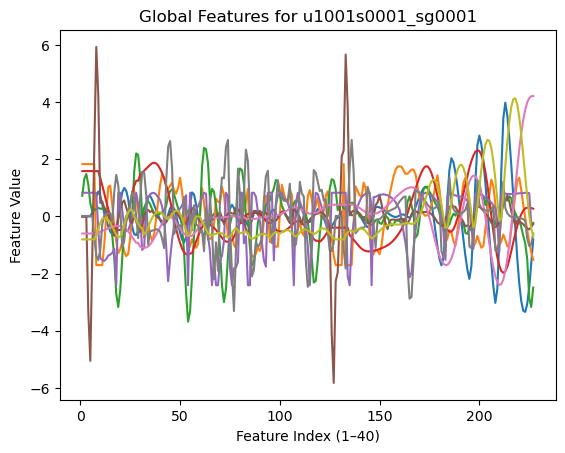

In [21]:
import scipy.io as sio
import matplotlib.pyplot as plt

# Load the file
mat = sio.loadmat(mat_file, squeeze_me=True, struct_as_record=False)
data = mat['localFunctions']  # this is your length‑40 vector

# Plot
plt.figure()
plt.plot(range(1, len(data)+1), data)         # x = feature index 1–40
plt.xlabel('Feature Index (1–40)')
plt.ylabel('Feature Value')
plt.title('Global Features for u1001s0001_sg0001')
plt.show()


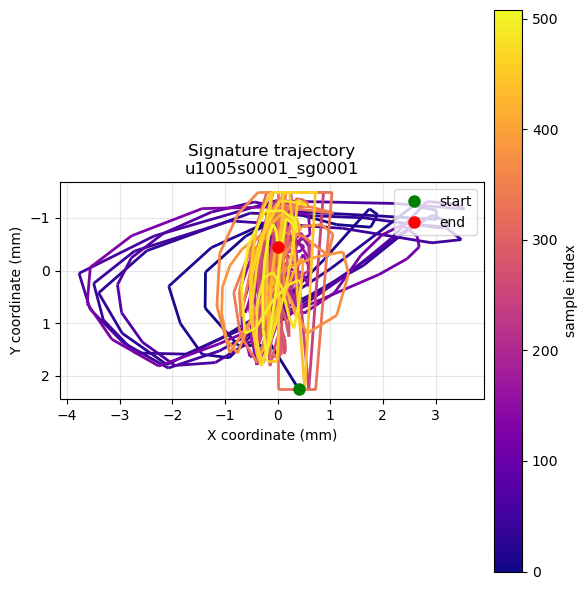

In [26]:
from pathlib import Path
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
from matplotlib.colors import Normalize


def plot_signature_trajectory(user: int, session: int, sample: int,
                              root=project_root / "data" / "raw" / "LocalFunctions",
                              cmap_name="viridis"):
    """Plot BiosecurID on-line signature with a gradient-coloured path."""
    fname = f"u{user:04d}s{session:04d}_sg{sample:04d}.mat"
    mat_path = root / fname
    if not mat_path.exists():
        raise FileNotFoundError(mat_path)

    # ── load trajectory ──────────────────────────────────────────────
    local = sio.loadmat(mat_path, squeeze_me=True)["localFunctions"]  # (N, 9)
    x, y = local[:, 0], local[:, 1]
    n_pts = len(x)

    # ── build coloured line segments ────────────────────────────────
    points = np.column_stack([x, y])
    segs = [points[i:i+2] for i in range(len(points)-1)]
    cmap   = plt.colormaps[cmap_name]          # <- NEW (was cm.get_cmap)
    lc     = LineCollection(
          segs,
          cmap=cmap,
          norm=Normalize(0, n_pts - 1)
        )
    lc.set_array(np.arange(n_pts - 1))
    lc.set_linewidth(2)

    # ── plot ────────────────────────────────────────────────────────
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.add_collection(lc)

    # start / end markers
    ax.plot(x[0],  y[0],  "go",  markersize=8, label="start")
    ax.plot(x[-1], y[-1], "ro",  markersize=8, label="end")

    ax.set_aspect("equal", adjustable="box")
    ax.invert_yaxis()                       # match writing surface coords
    ax.set_xlabel("X coordinate (mm)")
    ax.set_ylabel("Y coordinate (mm)")
    ax.set_title(f"Signature trajectory\nu{user:04d}s{session:04d}_sg{sample:04d}")
    ax.grid(True, alpha=0.3)
    ax.legend(loc="upper right")
    cbar = fig.colorbar(lc, ax=ax, pad=0.02)
    cbar.set_label("sample index")

    plt.tight_layout()
    plt.show()


# Example
plot_signature_trajectory(user=1005, session=1, sample=1, cmap_name="plasma")


(0.7, 7.3, -1.75, 3.75)

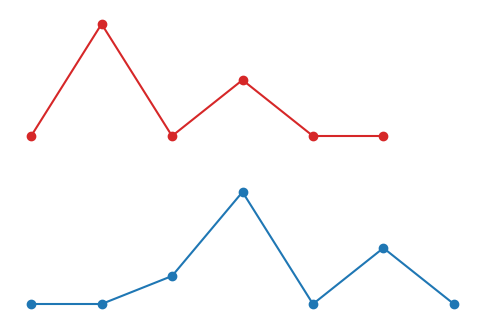

In [22]:
# Example 1: plot two signals offset vertically

import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 2, 0, 1, 0, 0])
y = np.array([0, 0, 0.5, 2, 0, 1, 0])

plt.figure(figsize=(6, 4))
plt.plot(np.arange(x.shape[0]) + 1, x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]) + 1, y - 1.5, "-o", c="C0")
plt.axis("off")


(-0.35000000000000003, 7.35, -1.75, 3.75)

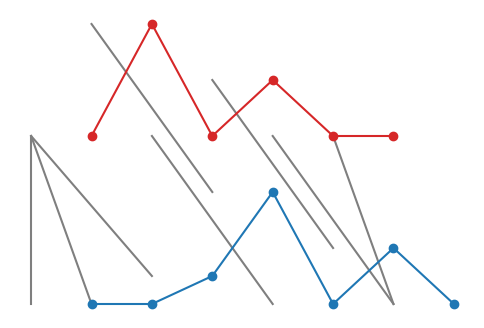

In [23]:
# Example 2: compute DTW and plot the alignment
import numpy as np
import matplotlib.pyplot as plt
from src.dtw.dtwAlgorithm import dp

# Distance matrix
N = x.shape[0]
M = y.shape[0]
dist_mat = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        dist_mat[i, j] = abs(x[i] - y[j])

# DTW
path, cost_mat = dp(dist_mat)

# Plot alignment
plt.figure(figsize=(6, 4))
for x_i, y_j in path:
    plt.plot(
        [x_i, y_j],
        [x[x_i] + 1.5, y[y_j] - 1.5],
        c="C7"
    )
plt.plot(np.arange(x.shape[0]) + 1, x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]) + 1, y - 1.5, "-o", c="C0")
plt.axis("off")

Distance matrix (shape: 202 x 192):
[[1.55982727 2.2745026  2.44362647 ... 6.60194116 6.6421366  6.24718007]
 [2.29085046 1.36520726 1.60713794 ... 6.54814138 6.80473152 6.18195968]
 [2.6803401  1.27886776 1.59516921 ... 6.571387   6.84405309 6.18875451]
 ...
 [7.78271081 7.9152647  8.10787428 ... 3.73063037 2.44766332 2.15958826]
 [8.13222775 8.10976285 8.26446753 ... 4.78413293 3.76473771 2.55480077]
 [7.42773904 7.22707947 7.34638124 ... 5.25350161 4.5870603  2.64876058]]


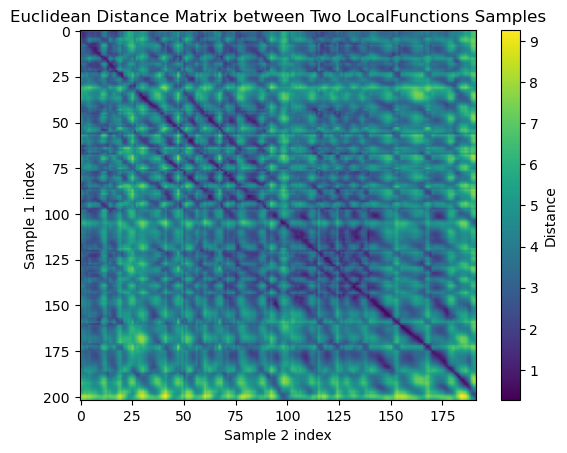

Alignment path has 206 steps
First 10 alignments: [(0, 0), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 3), (8, 4), (9, 5)]
Final DTW cost: 266.80386181552535


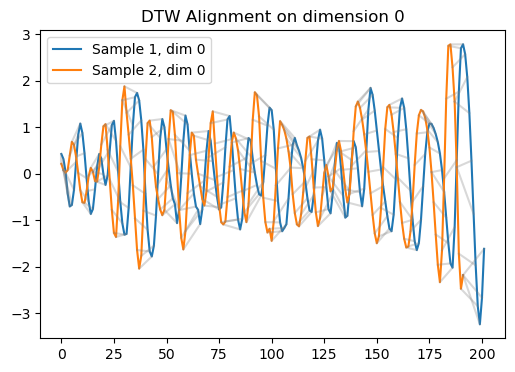

In [25]:
import scipy.io as sio
import numpy as np
from scipy.spatial.distance import cdist
from src.dtw.dtwAlgorithm import dp

# ── 1) Load two LocalFunctions files ──
mat1 = sio.loadmat(
    r"C:\Users\mattt\Skripsie\Projects\DTW-project\data\raw"
    r"\LocalFunctions\u1001s0001_sg0001.mat",
    squeeze_me=True, struct_as_record=False
)
mat2 = sio.loadmat(
    r"C:\Users\mattt\Skripsie\Projects\DTW-project\data\raw"
    r"\LocalFunctions\u1001s0001_sg0006.mat",
    squeeze_me=True, struct_as_record=False
)

X = mat1['localFunctions']   # shape: (N, 9)
Y = mat2['localFunctions']   # shape: (M, 9)

# ── 2) Compute the full vector‐to‐vector distance matrix ──
# this uses Euclidean distance between each 9‑dim sample pair
dist_mat = cdist(X, Y, metric='euclidean')   # shape: (N, M)
print("Distance matrix (shape: {} x {}):".format(dist_mat.shape[0], dist_mat.shape[1]))
print(dist_mat)

#plot distance heatmap
# ── Plot the distance matrix as a heatmap ──
plt.figure()
plt.imshow(dist_mat, aspect='auto')
plt.xlabel('Sample 2 index')
plt.ylabel('Sample 1 index')
plt.title('Euclidean Distance Matrix between Two LocalFunctions Samples')
plt.colorbar(label='Distance')
plt.show()

# ── 3) Run DTW (no changes to your dp function) ──
path, cost_mat = dp(dist_mat)

# ── 4) (Optional) Inspect the result ──
print(f"Alignment path has {len(path)} steps")
print("First 10 alignments:", path[:10])
print("Final DTW cost:", cost_mat[-1, -1])

# ── 5) (Optional) Plot just the X vs Y sequences with alignment lines ──
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
# plot the multivariate sequences in one chosen dimension (say dim=0)
plt.plot(X[:,0], label='Sample 1, dim 0')
plt.plot(Y[:,0], label='Sample 2, dim 0')
for i,j in path:
    plt.plot([i, j], [X[i,0], Y[j,0]], c='gray', alpha=0.3)
plt.legend()
plt.title("DTW Alignment on dimension 0")
plt.show()